# EDA

In [1]:
import os
import numpy as np 
import pandas as pd 
from scipy import stats 

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv('hw1_train.csv',index_col=[0])
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,204700
2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,102500
3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,177000
4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,237400
5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183600


In [3]:
test = pd.read_csv('hw1_test.csv',index_col=[0])
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
Id,,,,,,,,,,,,,,,,,,,,,
2001,30,RM,90.0,8100,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,6,2007,COD,Normal
2002,70,RM,60.0,10800,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2003,50,RM,52.0,9439,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
2004,20,RM,52.0,8626,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2005,80,RM,76.0,11800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2000 non-null   int64  
 1   MS Zoning        2000 non-null   object 
 2   Lot Frontage     1656 non-null   float64
 3   Lot Area         2000 non-null   int64  
 4   Street           2000 non-null   object 
 5   Alley            143 non-null    object 
 6   Lot Shape        2000 non-null   object 
 7   Land Contour     2000 non-null   object 
 8   Utilities        2000 non-null   object 
 9   Lot Config       2000 non-null   object 
 10  Land Slope       2000 non-null   object 
 11  Neighborhood     2000 non-null   object 
 12  Condition 1      2000 non-null   object 
 13  Condition 2      2000 non-null   object 
 14  Bldg Type        2000 non-null   object 
 15  House Style      2000 non-null   object 
 16  Overall Qual     2000 non-null   int64  
 17  Overall Cond  

In [5]:
train[['BsmtFin SF 1']]

,BsmtFin SF 1
Id,
1,639.0
2,468.0
3,923.0
4,1065.0
5,791.0
...,...
1996,0.0
1997,316.0
1998,0.0


In [6]:
print('Train Data | Data Types')
print('Object: ', train.dtypes[train.dtypes==object].count())
print('Numeric: ',train.dtypes[train.dtypes!=object].count())
print('*'*20)
print('*'*20)
print('Test Data | Data Types:')
print('Object: ', test.dtypes[test.dtypes==object].count())
print('Numeric: ',test.dtypes[test.dtypes!=object].count())

Train Data | Data Types
Object:  43
Numeric:  37
********************
********************
Test Data | Data Types:
Object:  43
Numeric:  36


In [7]:
train.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2000.000000,1656.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1983.000000,1999.000000,1999.000000,...,2000.0000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,56.952500,69.384662,9938.979500,6.136000,5.592000,1972.229000,1985.376500,105.853757,450.109555,47.913957,...,92.9155,47.203000,20.764500,2.85000,15.901000,1.061500,55.597000,6.102500,2008.470500,182520.900000
std,42.186966,23.523389,7588.517492,1.416865,1.132774,30.203521,20.636368,180.227916,461.439609,160.890206,...,120.3376,65.011461,57.760187,27.01067,56.149386,22.634263,553.050689,2.703451,0.989757,81867.392154
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2007.000000,13100.000000
25%,20.000000,59.000000,7439.000000,5.000000,5.000000,1955.000000,1967.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,2008.000000,129775.000000
50%,50.000000,68.000000,9475.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,375.000000,0.000000,...,0.0000,27.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000,2008.000000,162400.000000
75%,70.000000,80.000000,11475.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,737.500000,0.000000,...,168.0000,70.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,2009.000000,215625.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,736.0000,547.000000,432.000000,508.00000,576.000000,576.000000,15500.000000,12.000000,2010.000000,748000.000000


In [8]:
# these three variables are categorical data encoded

#train[['MS SubClass', 'Overall Qual', 'Overall Cond']] = train[['MS SubClass', 'Overall Qual', 'Overall Cond']].astype('object')
#test[['MS SubClass', 'Overall Qual', 'Overall Cond']] = test[['MS SubClass', 'Overall Qual', 'Overall Cond']].astype('object')

In [9]:
# 2. Data Cleaning ¶

In [10]:
train.duplicated().sum(), test.duplicated().sum()


(0, 2)

In [11]:
test.drop_duplicates(inplace=True)


In [12]:
test.duplicated().sum()


0

In [13]:
# Missing Data
print('Train Features | % missing data')
print('*'*30)
print(round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
print('\n'*2)
print('Test Features | % missing data')
print('*'*30)
round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False)

Train Features | % missing data
******************************
Pool QC           99.75
Misc Feature      95.90
Alley             92.85
Fence             80.80
Fireplace Qu      48.35
Lot Frontage      17.20
Garage Yr Blt      5.20
Garage Cond        5.20
Garage Qual        5.20
Garage Finish      5.20
Garage Type        5.15
Bsmt Exposure      2.75
BsmtFin Type 2     2.70
Bsmt Cond          2.65
BsmtFin Type 1     2.65
Bsmt Qual          2.65
Mas Vnr Type       0.85
Mas Vnr Area       0.85
Bsmt Half Bath     0.10
Bsmt Full Bath     0.10
Electrical         0.05
Bsmt Unf SF        0.05
BsmtFin SF 2       0.05
BsmtFin SF 1       0.05
Total Bsmt SF      0.05
dtype: float64



Test Features | % missing data
******************************


Pool QC           99.14
Misc Feature      97.41
Alley             94.18
Fence             79.74
Fireplace Qu      48.81
Lot Frontage      15.73
Garage Yr Blt      5.93
Garage Finish      5.93
Garage Qual        5.93
Garage Cond        5.93
Garage Type        5.82
Bsmt Exposure      3.02
BsmtFin Type 1     2.91
BsmtFin Type 2     2.91
Bsmt Cond          2.91
Bsmt Qual          2.91
Mas Vnr Area       0.65
Mas Vnr Type       0.65
Garage Cars        0.11
Garage Area        0.11
dtype: float64

In [14]:
a_train = (round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
b_test = (round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False))

a = (a_train.to_dict().copy())
b = (b_test.to_dict().copy())

for (feature,score) in a.items():
    print(feature,score)

Pool QC 99.75
Misc Feature 95.9
Alley 92.85
Fence 80.8
Fireplace Qu 48.35
Lot Frontage 17.2
Garage Yr Blt 5.2
Garage Cond 5.2
Garage Qual 5.2
Garage Finish 5.2
Garage Type 5.15
Bsmt Exposure 2.75
BsmtFin Type 2 2.7
Bsmt Cond 2.65
BsmtFin Type 1 2.65
Bsmt Qual 2.65
Mas Vnr Type 0.85
Mas Vnr Area 0.85
Bsmt Half Bath 0.1
Bsmt Full Bath 0.1
Electrical 0.05
Bsmt Unf SF 0.05
BsmtFin SF 2 0.05
BsmtFin SF 1 0.05
Total Bsmt SF 0.05


In [15]:
a_list = list(a.keys())
b_list = list(b.keys())

set1 = set(a_list)
set2 = set(b_list)

# Elements present in one of the sets but not both (symmetric difference)
result = list(set1.symmetric_difference(set2))
result

['Electrical',
 'Total Bsmt SF',
 'Garage Area',
 'Bsmt Unf SF',
 'Bsmt Full Bath',
 'BsmtFin SF 2',
 'Bsmt Half Bath',
 'Garage Cars',
 'BsmtFin SF 1']

In [16]:
len(np.unique(a_list +b_list))

27

In [17]:
# filling nan values of these columns with NA or 0 (Not Available) according to the data description

na_cat = ['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Garage Cond','Garage Qual','Garage Finish',
           'Garage Type','Bsmt Cond','Bsmt Exposure','Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2','Mas Vnr Type'
         ]
train[na_cat] = train[na_cat].fillna('NA')
test[na_cat] = test[na_cat].fillna('NA')

na_num = ['Garage Yr Blt','Bsmt Full Bath','Bsmt Half Bath','Garage Area','Garage Cars','Mas Vnr Area','Total Bsmt SF','Bsmt Unf SF',
           'BsmtFin SF 2','BsmtFin SF 1'
         ]

train[na_num] = train[na_num].fillna(0)
test[na_num] = test[na_num].fillna(0)


In [18]:
a_new = (round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
a_new = (a_new.to_dict())

print('Train Features | % missing data')
print('*'*30)
for (feature,score) in a_new.items():
    print(feature,score)
print("\n")
print('Test Features | % missing data')
print('*'*30)

b_new = (round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False))
b_new = (b_new.to_dict())
for (feature,score) in b_new.items():
    print(feature,score)

Train Features | % missing data
******************************
Lot Frontage 17.2
Electrical 0.05


Test Features | % missing data
******************************
Lot Frontage 15.73


In [19]:
# Categorical Features with a very low number of missing values will be replaced by the mode
train['Electrical'] = train['Electrical'].fillna("SBrkr") 

# Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].transform( lambda x: x.fillna(x.mean()))
test['Lot Frontage'] = test.groupby('Neighborhood')['Lot Frontage'].transform( lambda x: x.fillna(x.mean()))


In [20]:
a_new = (round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
a_new = (a_new.to_dict())

print('Train Features | % missing data')
print('*'*30)
for (feature,score) in a_new.items():
    print(feature,score)
print("\n")
print('Test Features | % missing data')
print('*'*30)

b_new = (round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False))
b_new = (b_new.to_dict())
for (feature,score) in b_new.items():
    print(feature,score)

Train Features | % missing data
******************************


Test Features | % missing data
******************************
Lot Frontage 0.32


In [21]:
# There are still some missing data, Let's check out the mean (or count) for each neighborhood.


In [22]:
test[test['Lot Frontage'].isna()]


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
Id,,,,,,,,,,,,,,,,,,,,,
2257,120,RM,NaN,9763,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2007,WD,Normal
2789,160,RH,NaN,3612,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,6,2006,WD,Normal
2893,120,RM,NaN,8239,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,11,2006,WD,Normal


In [23]:

print('Neighborhood | Count of Lot Frontage')
print('*'*30)
print(test.groupby('Neighborhood')['Lot Frontage'].count().sort_values(ascending=False))
print("\n")
print('Neighborhood | Lot Frontage Mean')
print('*'*30)
print(test.groupby('Neighborhood')['Lot Frontage'].mean().sort_values(ascending=False))

Neighborhood | Count of Lot Frontage
******************************
Neighborhood
CollgCr    125
NAmes       99
Edwards     83
OldTown     64
Sawyer      62
Crawfor     54
Mitchel     51
IDOTRR      45
BrkSide     39
Gilbert     38
NridgHt     32
Timber      32
SawyerW     29
Somerst     28
NWAmes      25
ClearCr     19
MeadowV     18
SWISU       17
NoRidge     17
StoneBr     15
Blmngtn     11
BrDale       9
Greens       4
Veenker      4
NPkVill      3
Blueste      2
Landmrk      0
GrnHill      0
Name: Lot Frontage, dtype: int64


Neighborhood | Lot Frontage Mean
******************************
Neighborhood
ClearCr    99.333333
NoRidge    95.166667
NridgHt    87.200000
NWAmes     82.352941
Sawyer     80.675000
SawyerW    77.458333
Mitchel    77.414634
Gilbert    75.481481
Timber     75.291667
NAmes      74.976190
CollgCr    72.017857
Crawfor    69.488889
StoneBr    67.857143
Veenker    66.000000
Edwards    64.441558
Somerst    62.760000
OldTown    61.516129
IDOTRR     59.227273
SWISU    

In [24]:
# We fill  the remaining missing Data with 0
#test['Lot Frontage'] = test['Lot Frontage'].fillna(0)
test.dropna(subset=['Lot Frontage'], inplace=True)


In [25]:
# Missing Data
print('Train Features | % missing data')
print('*'*30)
print(round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
print('\n'*2)
print('Test Features | % missing data')
print('*'*30)
round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False)

Train Features | % missing data
******************************
Series([], dtype: float64)



Test Features | % missing data
******************************


Series([], dtype: float64)

In [26]:
train.SalePrice.describe().to_frame()

,SalePrice
count,2000.000000
mean,182520.900000
std,81867.392154
min,13100.000000
25%,129775.000000
50%,162400.000000
75%,215625.000000
max,748000.000000


In [27]:
def targe_plot(target):
    fig, ax = plt.subplots(1, 3,figsize=(18,6), dpi=100)

    sns.histplot(x=target, data=train, kde=True, element="step", stat="density", ax=ax[0])

    ## Plotting the QQ_Plot. 
    stats.probplot(train.loc[:,target], plot = ax[1])

    sns.boxplot(x=target, data=train,  ax=ax[2])
    ax[0].set_title(f"Skewness: {train[target].skew()}  \n Kurtosis: {train[target].kurt()}", fontsize=14, )

    plt.suptitle(target, fontsize=18)
    fig.tight_layout()
    plt.show()

In [28]:
#train['TotalSF']=train['Total Bsmt SF'] + train['1st Flr SF'] + train['2nd Flr SF']
#test['TotalSF']=test['Total Bsmt SF'] + test['1st Flr SF'] + test['2nd Flr SF']


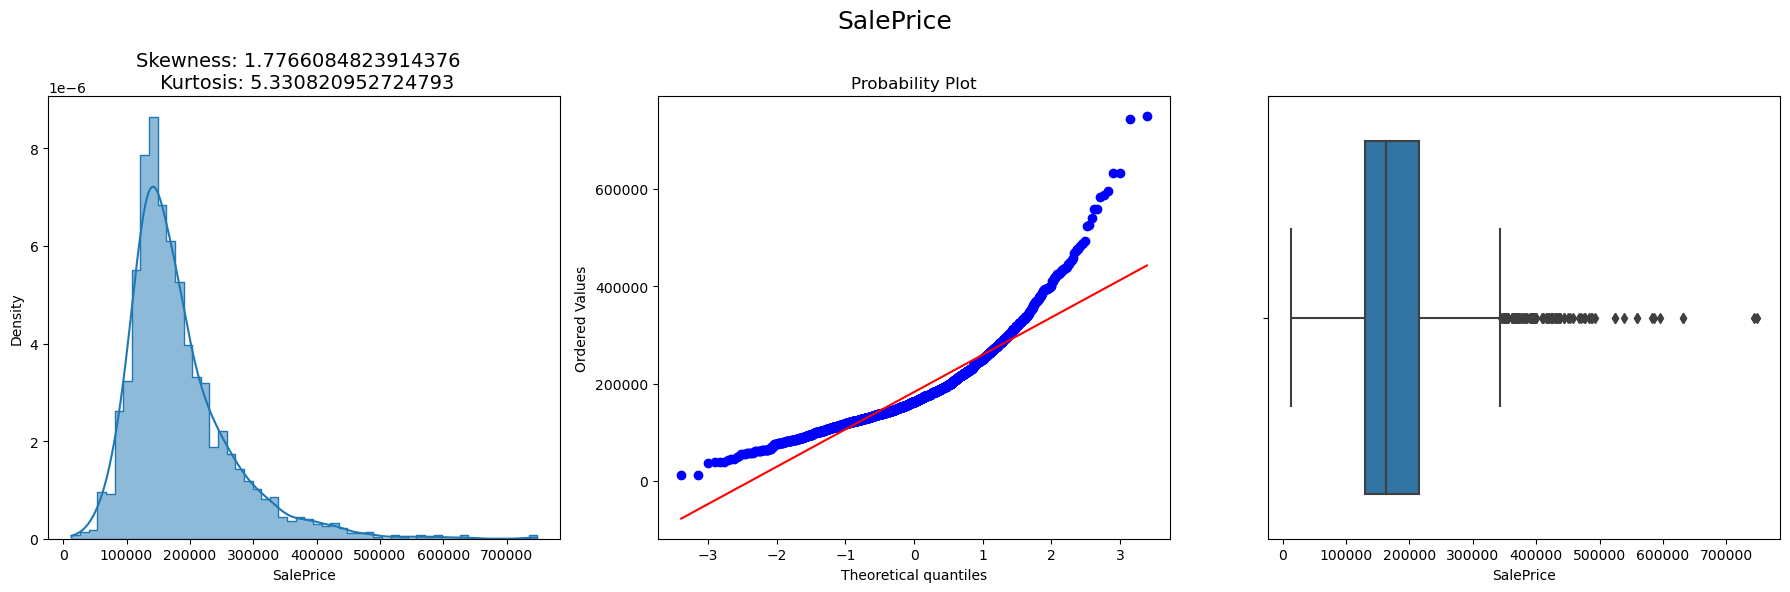

In [29]:
targe_plot('SalePrice')

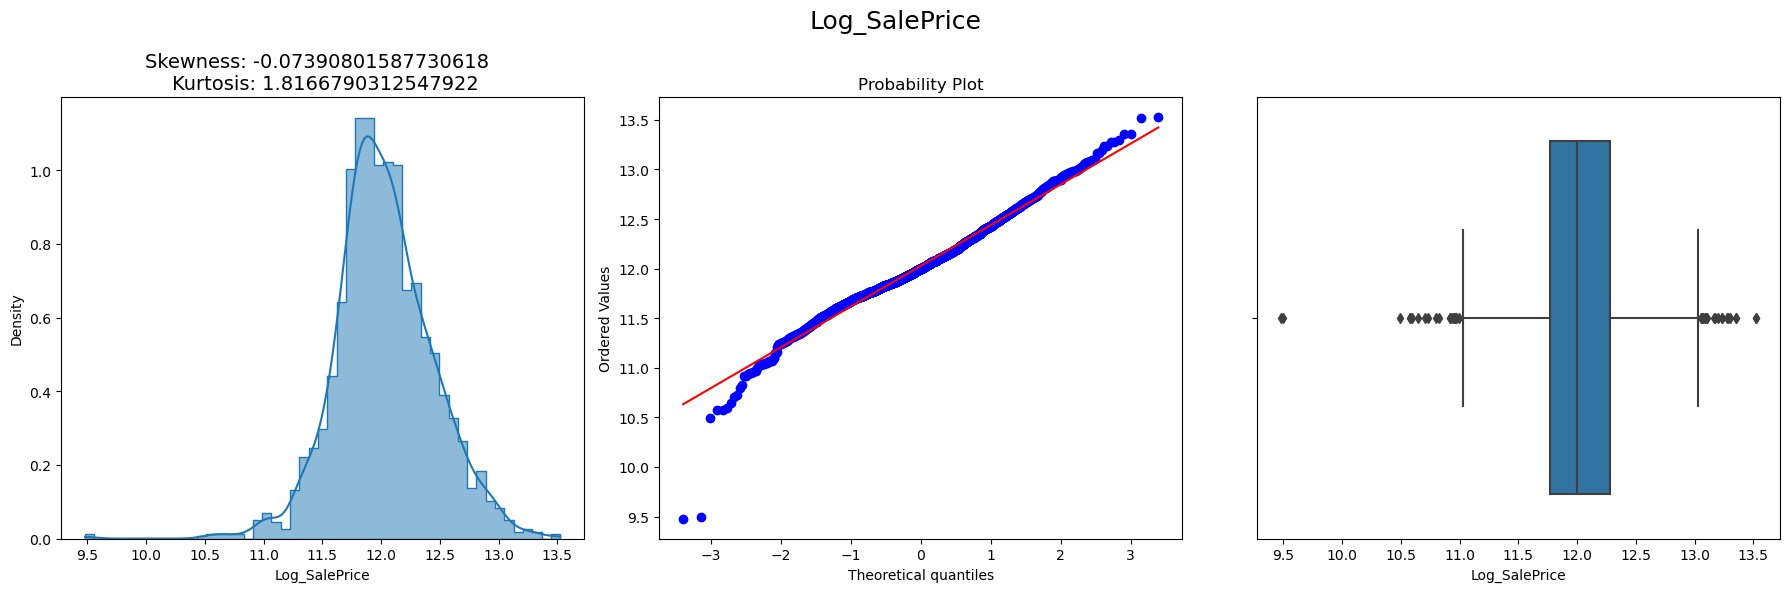

In [30]:
train['Log_SalePrice'] = np.log1p(train.SalePrice)
targe_plot('Log_SalePrice')

In [31]:
#Correlation : dentify which variables are most important in predicting the target variable
palettes=['BuPu', 'Purples_r','YlGnBu_r', 'cool','coolwarm_r', 'gist_rainbow', 'gnuplot2', 'hsv_r']
sns.set_palette(palettes[1])


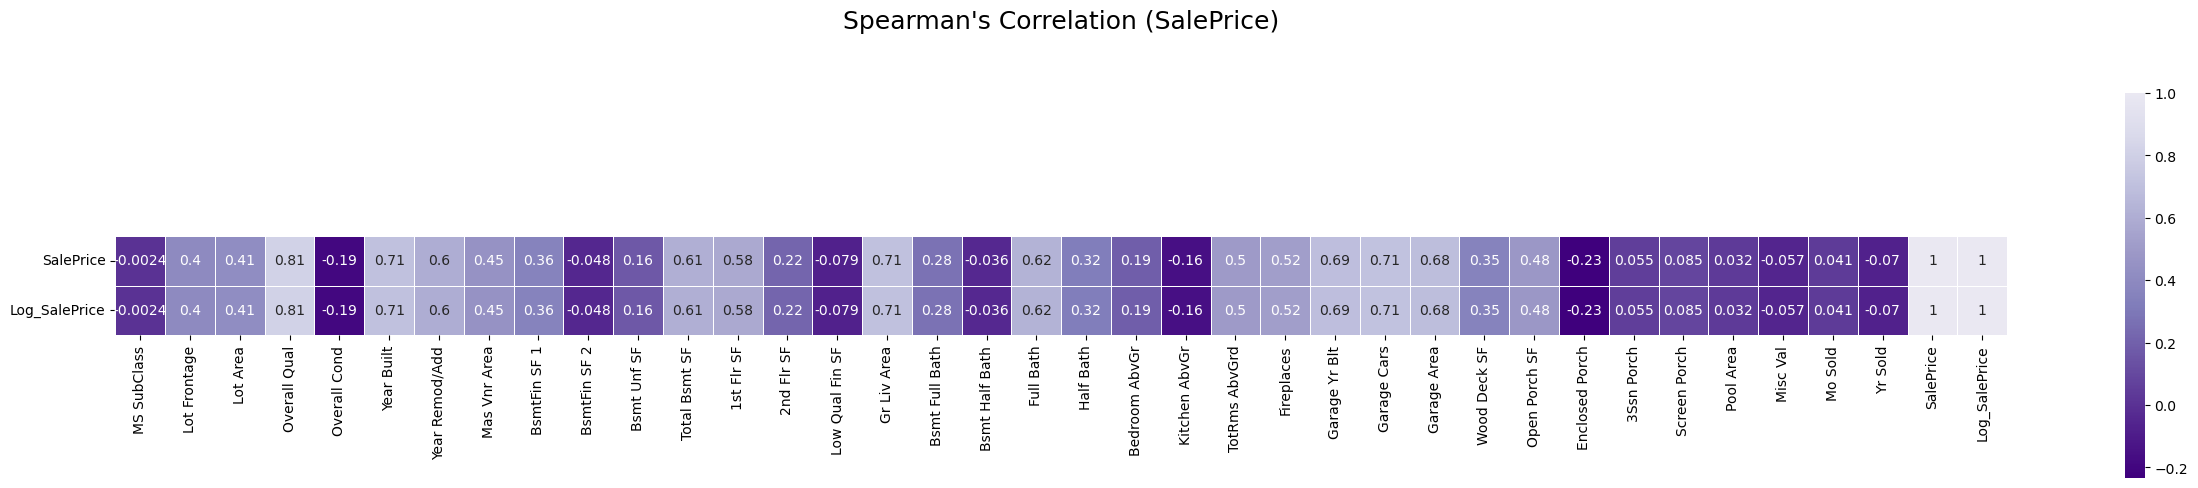

In [32]:
mat_corr=train.corr(method='spearman')[['SalePrice', 'Log_SalePrice']]

plt.figure(figsize=(25,8), dpi=100)

sns.heatmap(mat_corr.T, annot=True, center=0.5, vmax=1, cmap=palettes[1],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title("Spearman's Correlation (SalePrice)", fontsize=18, y=3)
plt.tight_layout()
plt.show()


In [33]:
# Numerical Variables with a strong relationship to the target
num_feat_sel = mat_corr[abs(mat_corr.SalePrice)>0.5].index.to_list()
print('Selected Numerical Features: \n\n', num_feat_sel)

Selected Numerical Features: 

 ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice', 'Log_SalePrice']


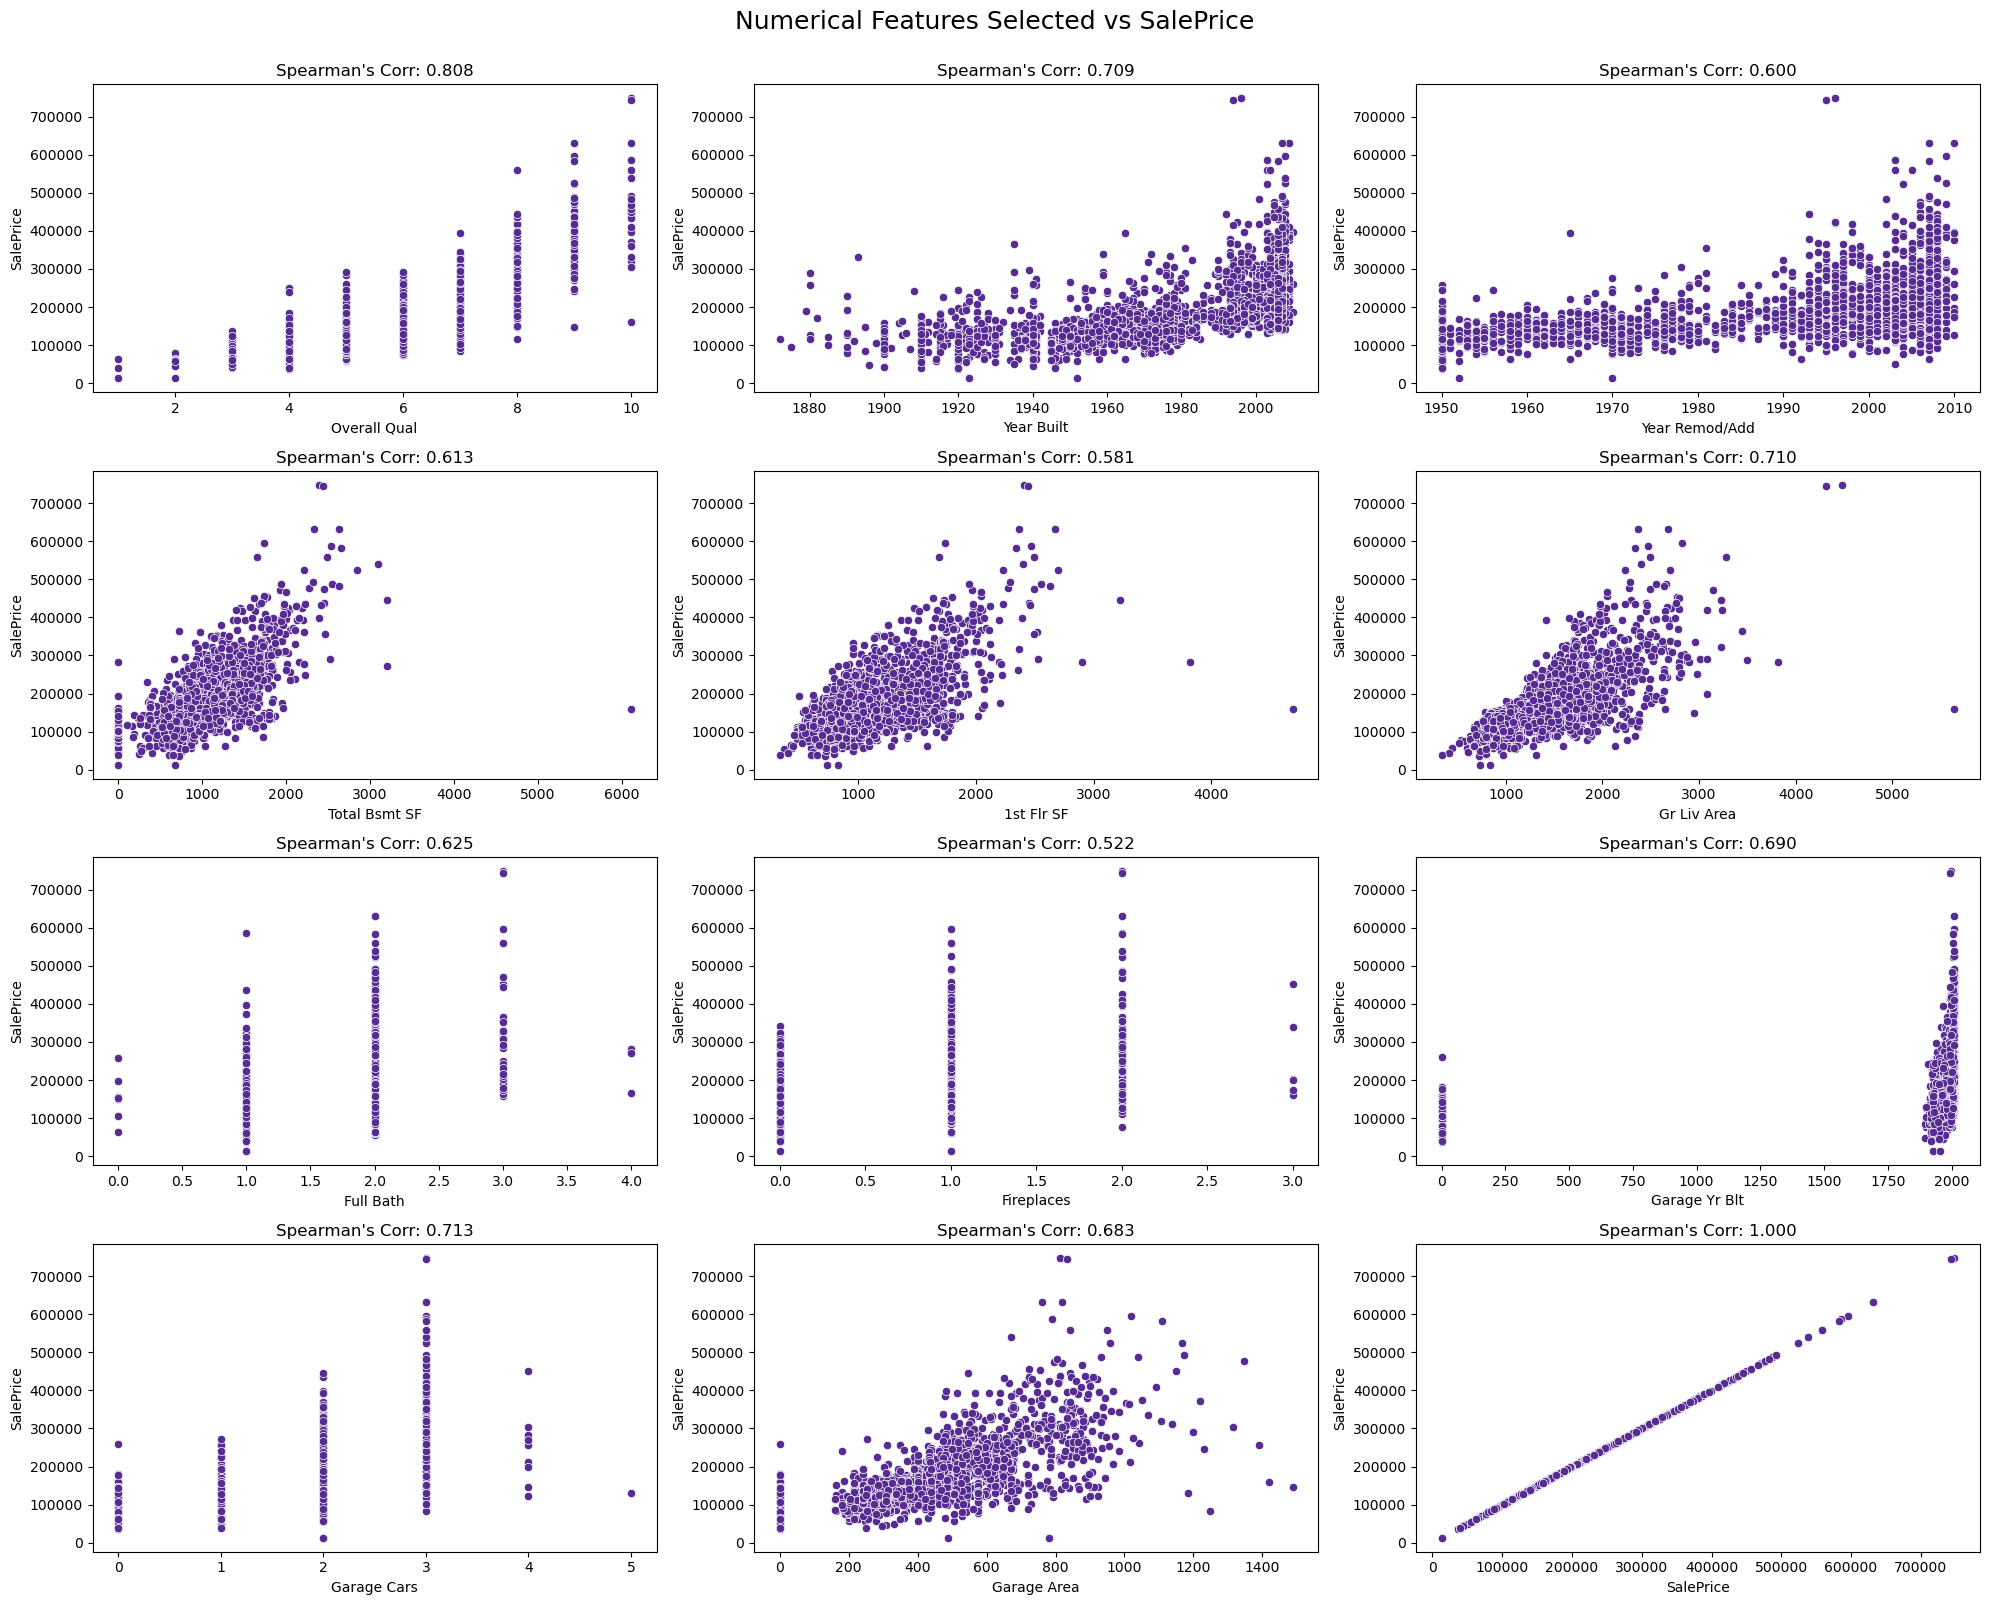

In [34]:
ncols = 3
nrows = round(len(num_feat_sel)/ncols)
fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=100)
for idx, col in enumerate(num_feat_sel[:-1]):
    chart = sns.scatterplot(x=col, y='SalePrice', data=train, ax=ax[idx//ncols, idx%ncols])
    chart.set_title(f"Spearman's Corr: {mat_corr.SalePrice[col]:.3f}")

fig.suptitle('Numerical Features Selected vs SalePrice', fontsize=18 , y=1)
fig.tight_layout()
plt.show()

In [35]:
train[train['Gr Liv Area'] >= 4000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Log_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1499,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,...,Gd,NA,NA,0,1,2008,New,Partial,159700,11.981059
1761,60,RL,160.0,15623,Pave,NA,IR1,Lvl,AllPub,Corner,...,Ex,MnPrv,NA,0,7,2007,WD,Abnorml,748000,13.525160
1768,60,RL,104.0,21535,Pave,NA,IR1,Lvl,AllPub,Corner,...,NA,NA,NA,0,1,2007,WD,Normal,743700,13.519394


In [36]:
train_orig = train.copy()

# Get rid of outliers in GrLivArea > 4000
train = train[train['Gr Liv Area'] < 4000].copy()
train.reset_index(drop = True, inplace = True)

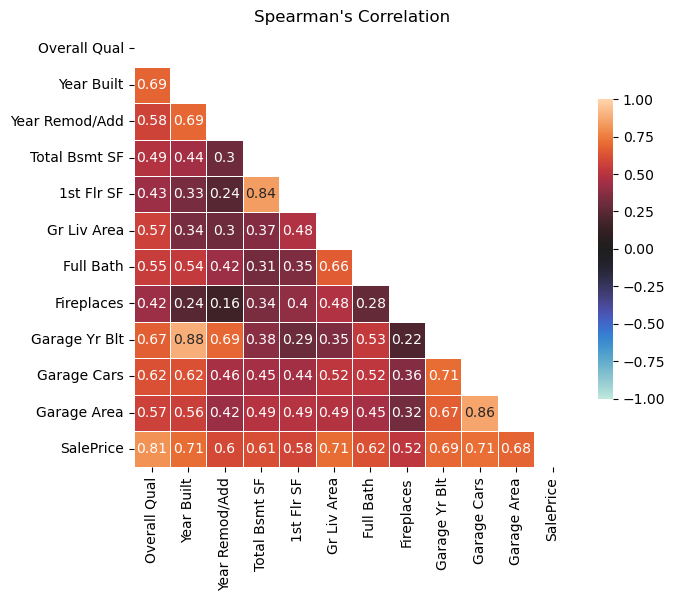

In [37]:
# Spearman's Correlation for the numerical variables previously selected

plt.figure(figsize=(7,7), dpi=100)
mat_corr=train[num_feat_sel[:-1]].corr(method='spearman')

sns.heatmap(mat_corr, annot=True, mask=np.triu(np.ones_like(mat_corr, dtype=bool)), center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Spearman's Correlation", fontsize=12 )
plt.tight_layout()
plt.show()

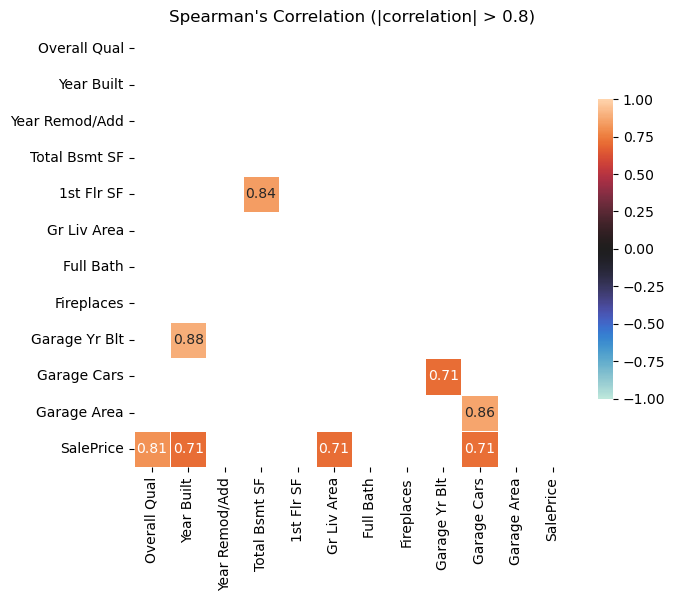

In [38]:
plt.figure(figsize=(7, 7), dpi=100)
# Mask to only display strong correlations (> 0.8)
mask = ~(np.abs(mat_corr) > 0.7) | ~(np.abs(mat_corr) < 1) | np.triu(np.ones_like(mat_corr, dtype=bool))

sns.heatmap(mat_corr, annot=True, mask=mask, center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title("Spearman's Correlation (|correlation| > 0.8)", fontsize=12)
plt.tight_layout()
plt.show()


In [39]:
#Categorical Features 
anova_feat = train.columns[train.dtypes=='object'].to_list()

anovaStats = []

for var in anova_feat:
    catGrouplist = train.groupby(var).Log_SalePrice.apply(list)
    anovaStats.append([var, *stats.f_oneway(*catGrouplist)])
    
anova_df = pd.DataFrame(anovaStats, columns=['Feature', 'statistic', 'pvalue'])

In [40]:
cat_feat_sel = anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:28].Feature
anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:28]


,Feature,statistic,pvalue
0,Neighborhood,113.674009,0.000000e+00
1,Bsmt Qual,399.002870,6.501485e-297
2,Exter Qual,629.711192,7.014200e-288
3,Kitchen Qual,418.311432,8.019789e-262
4,Garage Finish,380.997292,1.427173e-195
5,Foundation,209.830899,4.844115e-180
6,Garage Type,160.898057,6.656182e-167
7,Fireplace Qu,173.940647,8.069496e-154
8,Heating QC,197.945263,4.891050e-143
9,BsmtFin Type 1,119.618731,2.912934e-129


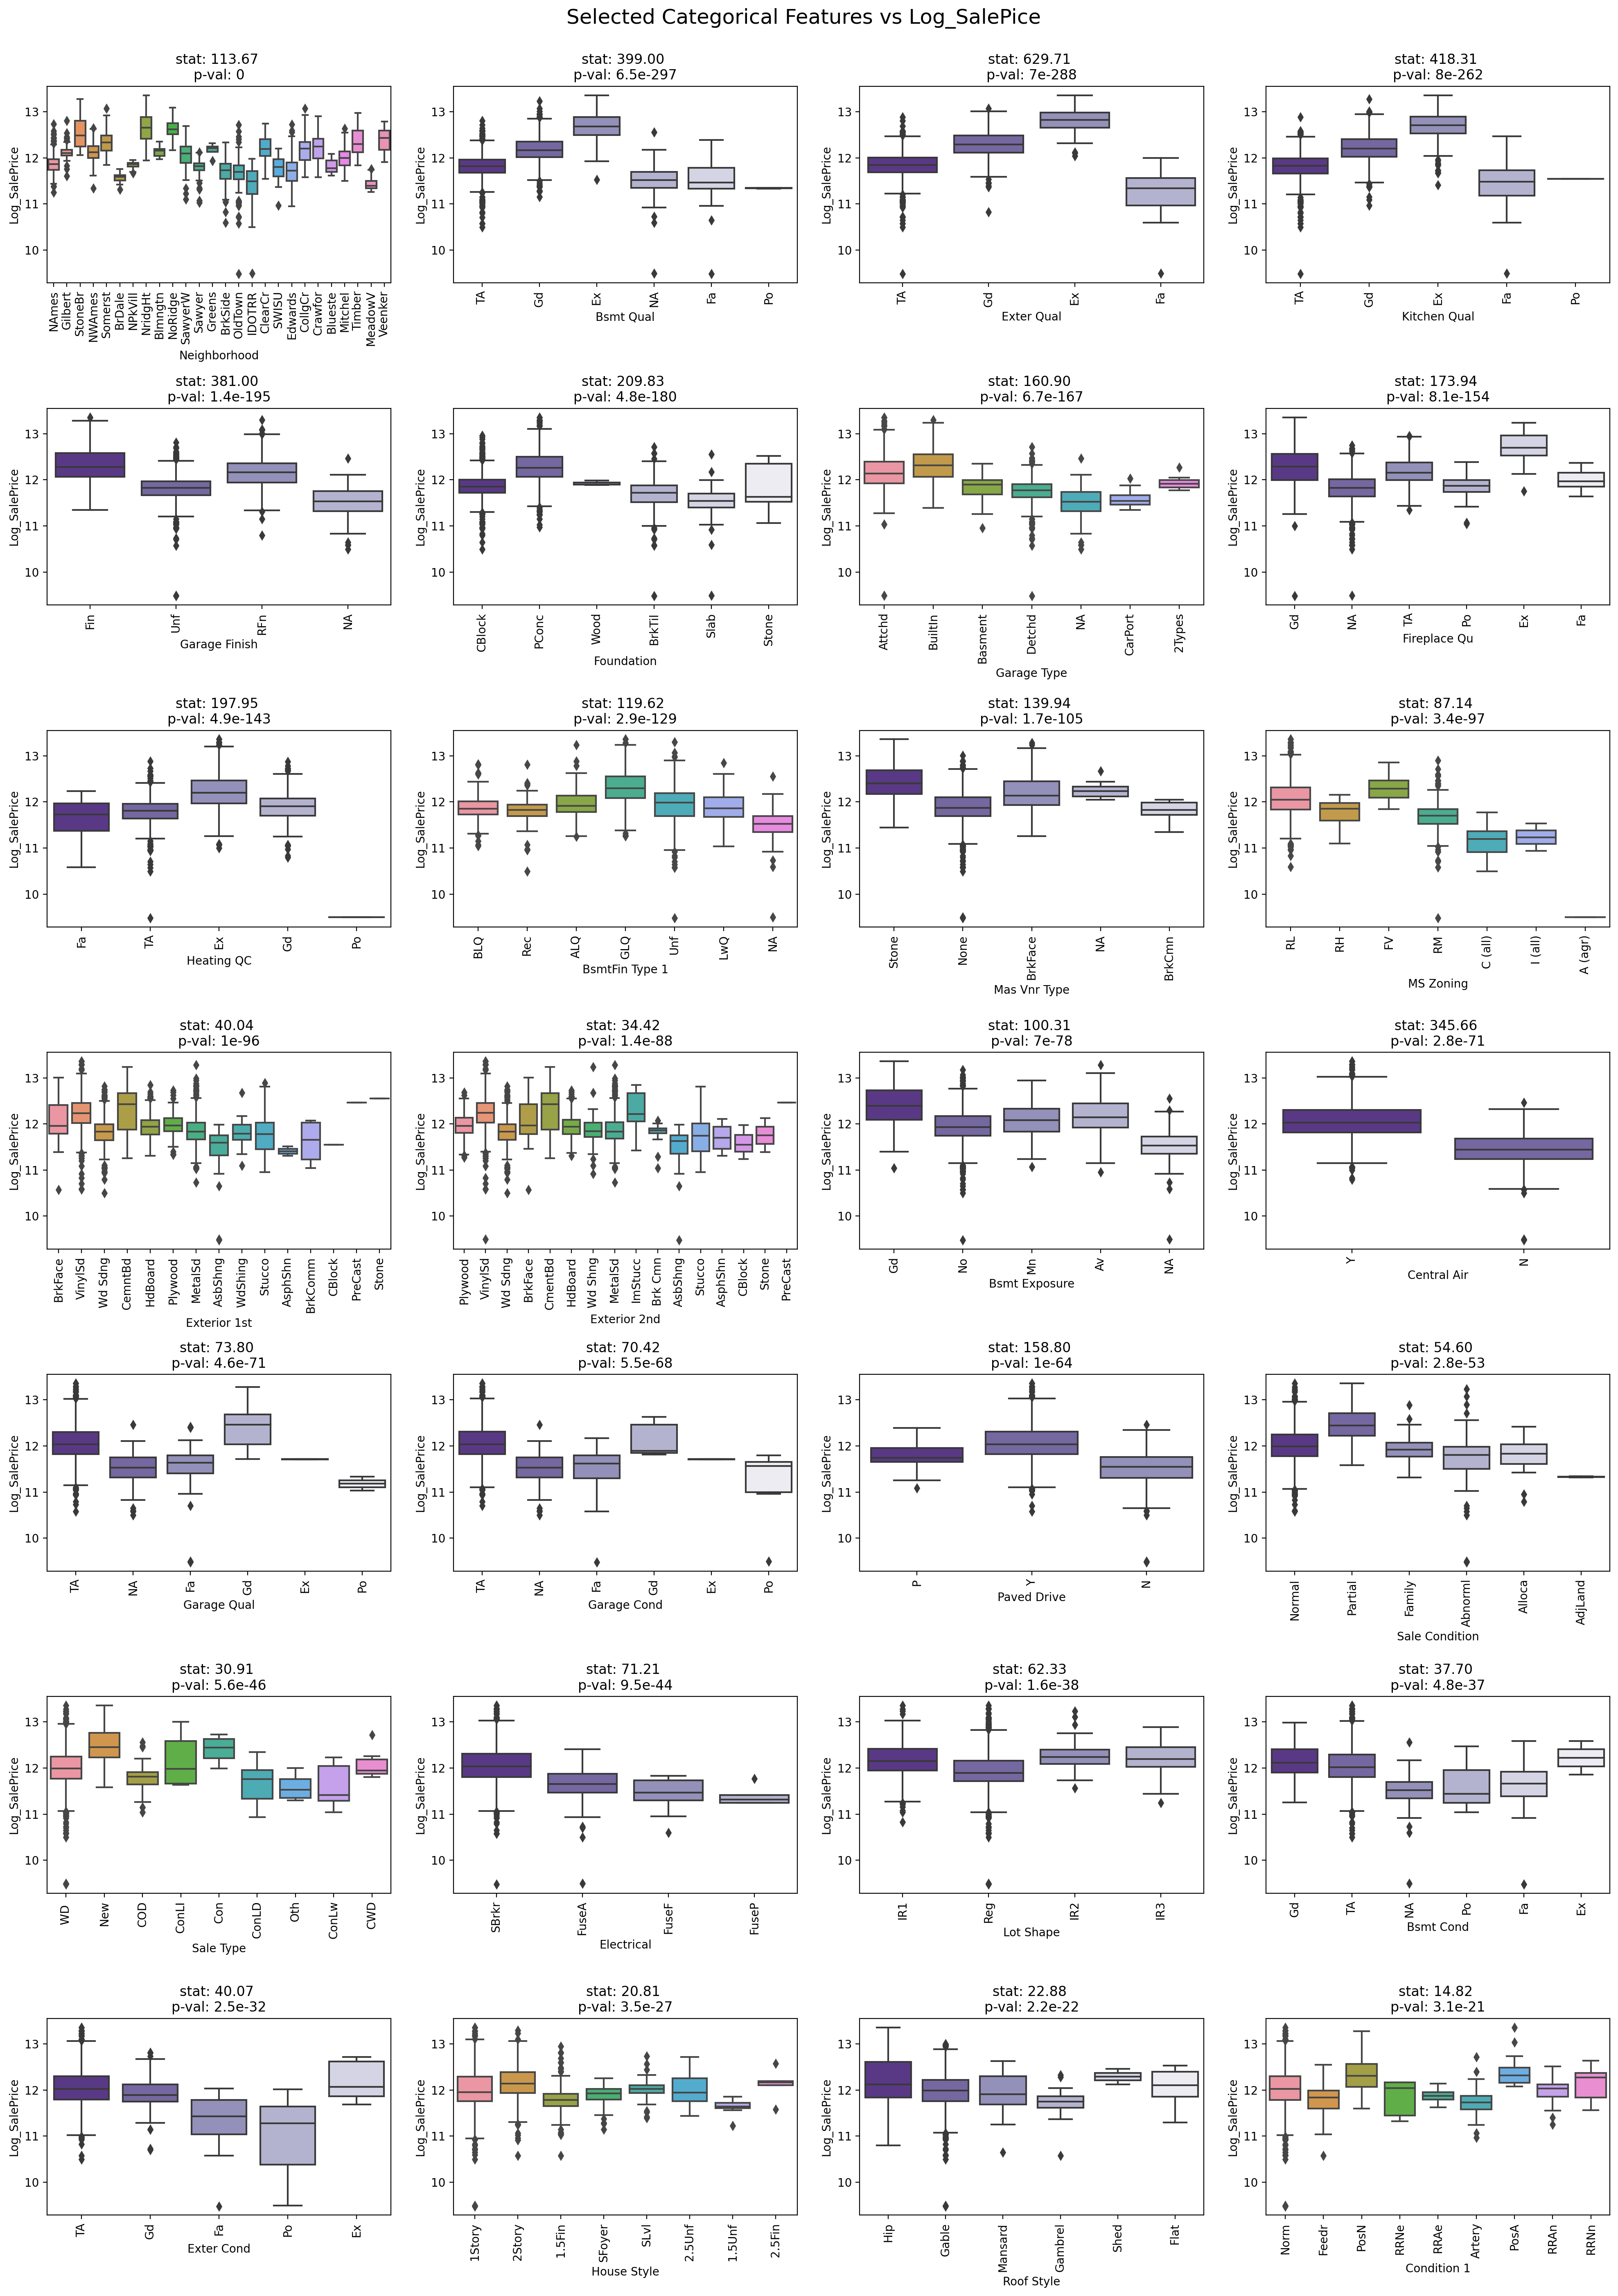

In [41]:
ncols = 4 
nrows = round(len(cat_feat_sel)/ncols)

fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=200)

for idx, col in enumerate(cat_feat_sel):
    chart=sns.boxplot(x=col, y='Log_SalePrice', data=train, ax=ax[idx//ncols, idx%ncols])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    arr = anova_df.loc[anova_df.Feature==col, ['statistic', 'pvalue']].values[0]
    chart.set_title(f"stat: {arr[0]:.2f} \np-val: {arr[1]:.2g}")

fig.suptitle('Selected Categorical Features vs Log_SalePice', fontsize=18 , y=1)
plt.tight_layout()
plt.show()

In [42]:
# Assiging column names to row indexs 
chi2matrix=pd.DataFrame(train[cat_feat_sel],columns=cat_feat_sel,index=cat_feat_sel)

for icol in cat_feat_sel: # Outer loop
    for jcol in cat_feat_sel: # inner loop
        
        # Converting to cross tab as for CHi-square test we have to first convert variables into contigency table
        crosstab=pd.crosstab(train[icol],train[jcol])
      
        #Getting p-value and other usefull information
        stat,p,dof,expected = stats.chi2_contingency(crosstab)
        
        # Rounding very small p-values to zero
        chi2matrix.loc[icol,jcol]= p
        
        # As mentioned above Expected frequencies should be at least 5 for the majority (80%) of the cells.
        # Here we are checking expected frequency of each group
        cntexpected=expected[expected<5].size
        #Getting percentage 
        perexpected=((expected.size-cntexpected)/expected.size)*100

        if perexpected<20:
            chi2matrix.loc[icol,jcol]=1
        if icol==jcol:
             chi2matrix.loc[icol,jcol]=0.00

        

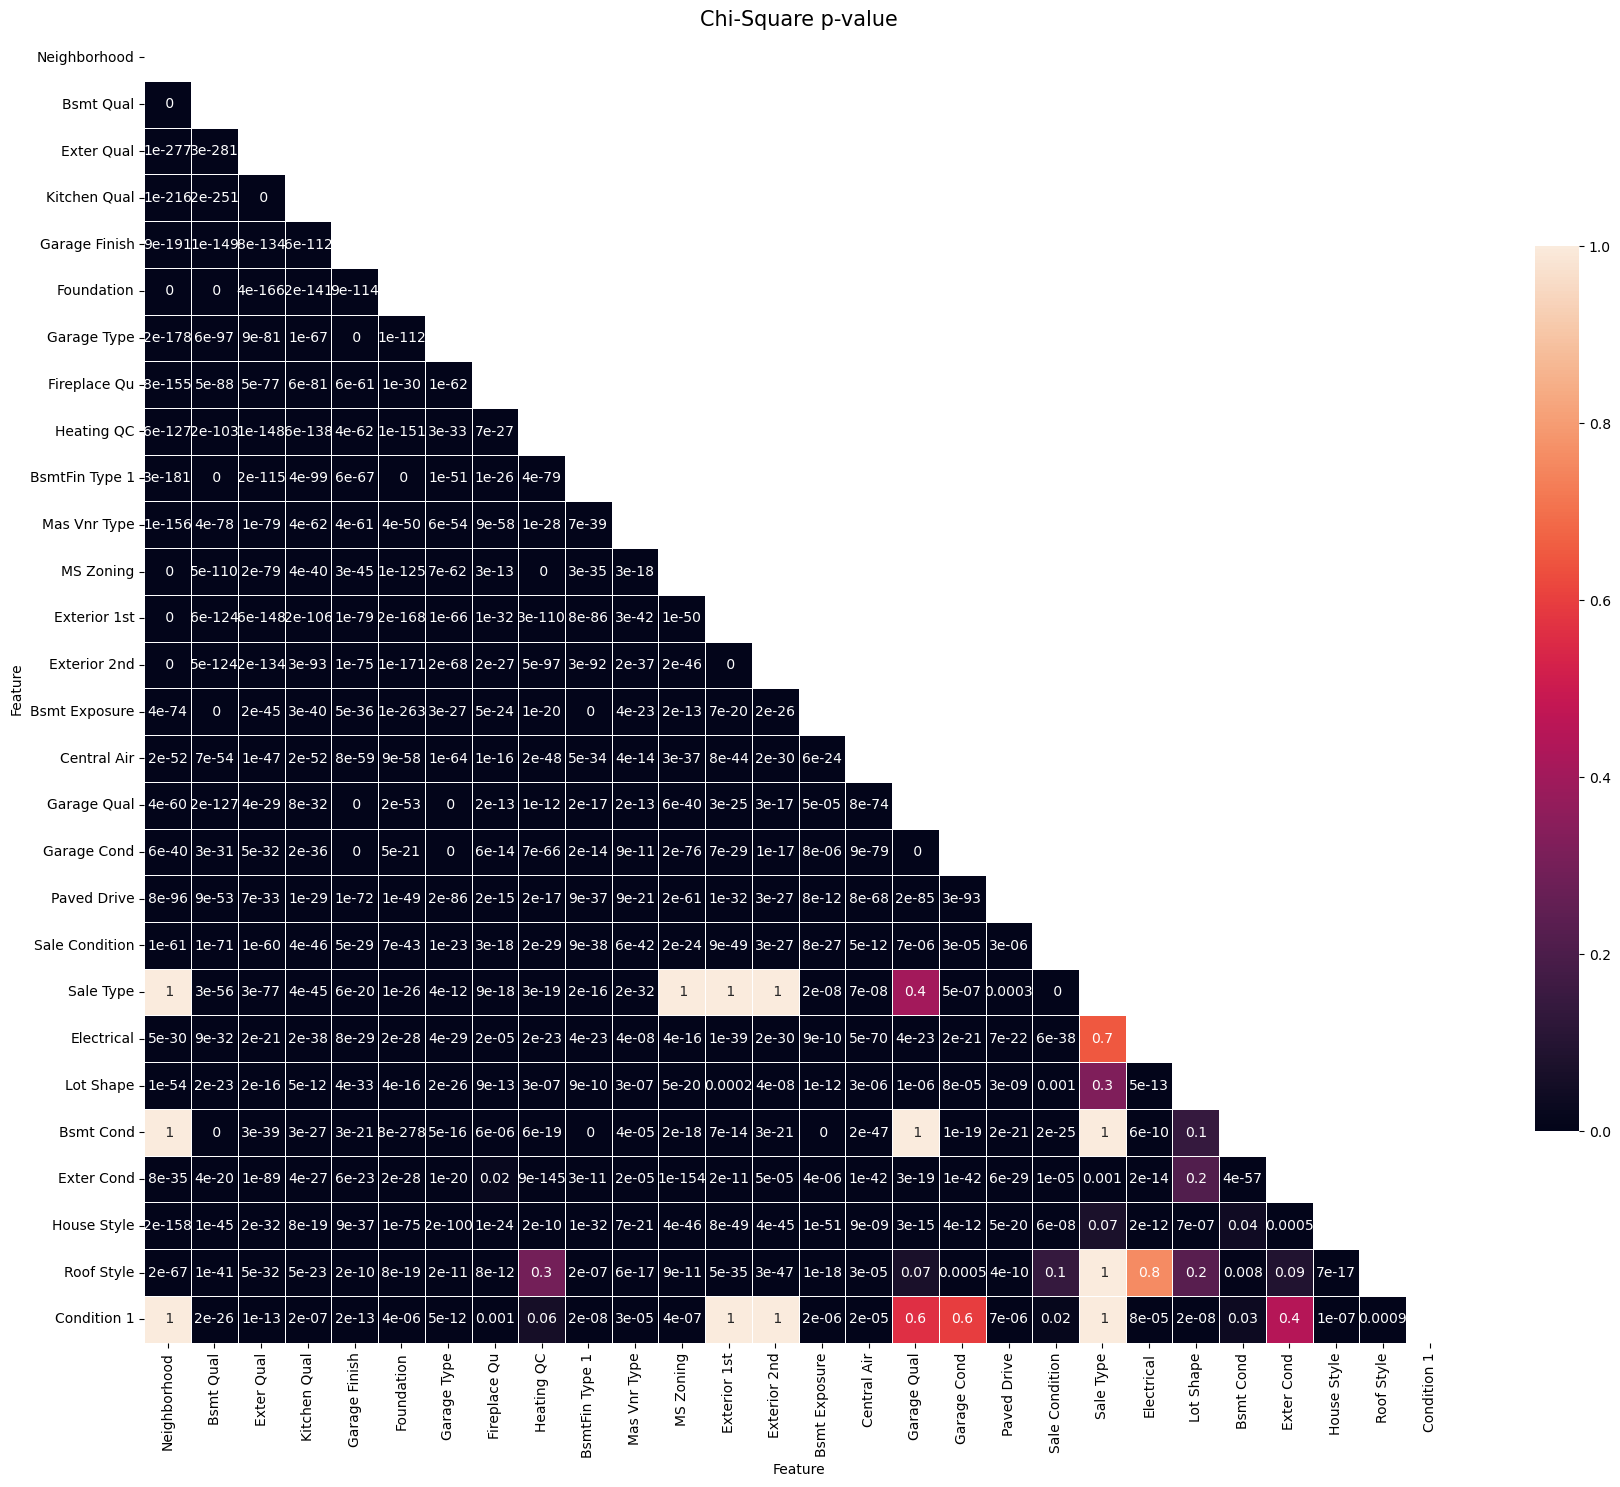

In [43]:
plt.figure(figsize=(18,18), dpi=100)

chi2matrix = chi2matrix.astype(float)

sns.heatmap(chi2matrix, 
            annot=True, fmt='2.0g', 
            mask=np.triu(np.ones_like(chi2matrix, dtype=bool)), 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Chi-Square p-value", fontsize=15 )
plt.tight_layout()
plt.show()

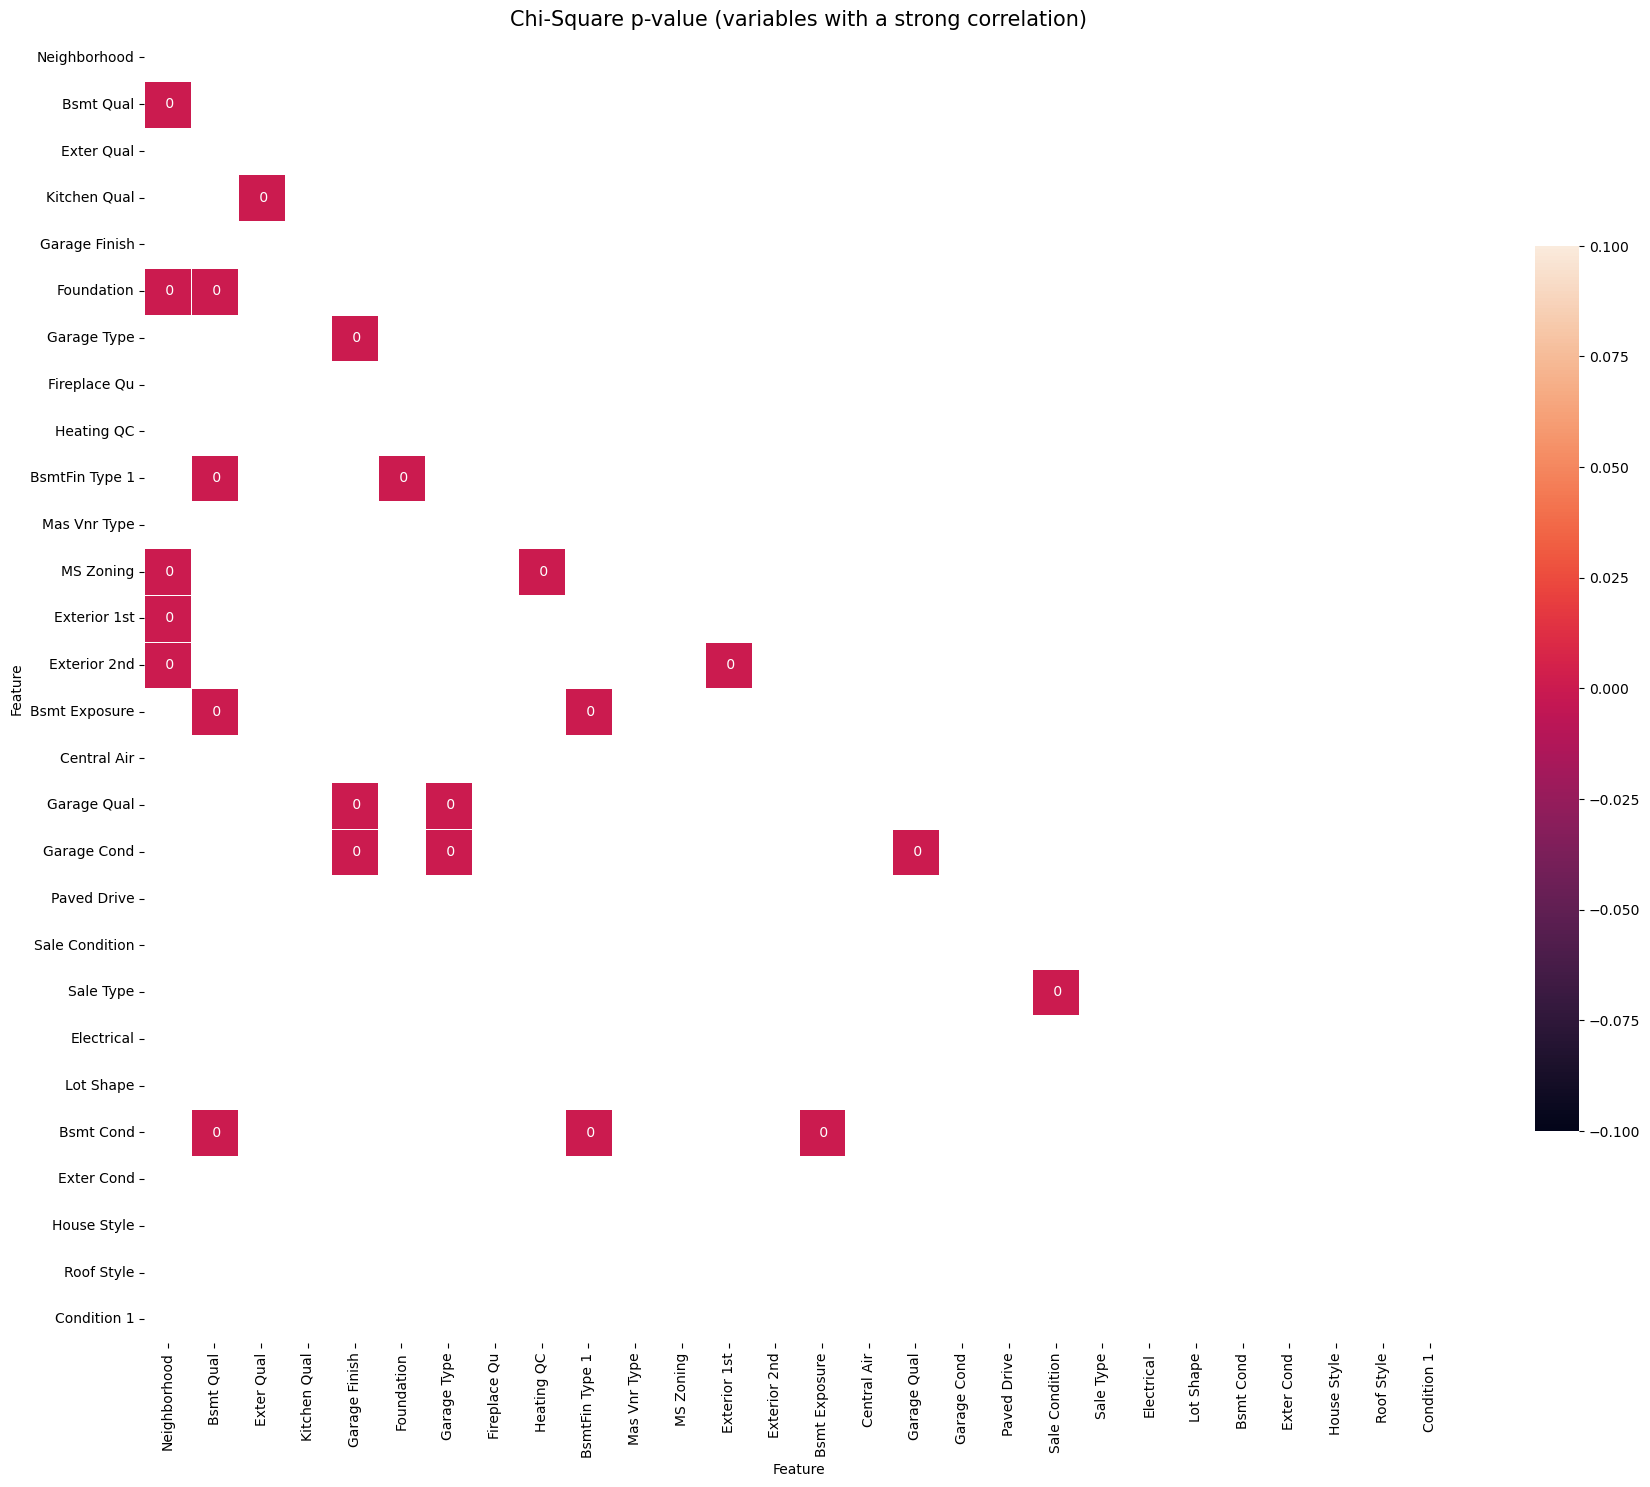

In [44]:
plt.figure(figsize=(18,18), dpi=100)

chi2matrix = chi2matrix.astype(float)

mask = ~(np.abs(chi2matrix) ==0) | np.triu(np.ones_like(chi2matrix, dtype=bool))

sns.heatmap(chi2matrix, 
            annot=True, fmt='2.0g', 
            mask=mask, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Chi-Square p-value (variables with a strong correlation)", fontsize=15 )
plt.tight_layout()
plt.show()

In [45]:
zero_correlations = []
for row in chi2matrix.index:
    for col in chi2matrix.columns:
        if chi2matrix.loc[row, col] == 0 and row != col:  # Check for zero and avoid self-correlation
            zero_correlations.append((row, col))

# Remove duplicates since matrix is symmetric
zero_correlations = list(set([tuple(sorted(pair)) for pair in zero_correlations]))

# Display results
print("These variables have a strong correlation\n")
for pair in zero_correlations:
    print(f" {pair[0]} & {pair[1]}= 0")

These variables have a strong correlation

 Garage Cond & Garage Type= 0
 Exter Qual & Kitchen Qual= 0
 Sale Condition & Sale Type= 0
 Exterior 2nd & Neighborhood= 0
 Bsmt Qual & Foundation= 0
 Heating QC & MS Zoning= 0
 Garage Finish & Garage Qual= 0
 Exterior 1st & Neighborhood= 0
 MS Zoning & Neighborhood= 0
 Garage Finish & Garage Type= 0
 Garage Cond & Garage Finish= 0
 Bsmt Qual & BsmtFin Type 1= 0
 Foundation & Neighborhood= 0
 Bsmt Cond & Bsmt Qual= 0
 Bsmt Exposure & Bsmt Qual= 0
 BsmtFin Type 1 & Foundation= 0
 Bsmt Qual & Neighborhood= 0
 Bsmt Cond & Bsmt Exposure= 0
 Bsmt Exposure & BsmtFin Type 1= 0
 Bsmt Cond & BsmtFin Type 1= 0
 Garage Qual & Garage Type= 0
 Garage Cond & Garage Qual= 0
 Exterior 1st & Exterior 2nd= 0


#### These variables have a strong correlation

Kitchen Qual & Overall Qual

Exter Qual & Overall Qual

Neighborhood & Overall Qual

Bsmt Qual & Overall Qual


Foundation & Neighborhood

MS Zoning & Neighborhood

Exterior 1st & Neighborhood

MS SubClass & Neighborhood

Bsmt Qual & Neighborhood

Exterior 2nd & Neighborhood

In [46]:
remov = ['GarageArea', 'GarageYrBlt', 'Exterior2nd', 'MSZoning', 'GarageQual', 'BsmtCond']
num_feat = [feat for feat in num_feat_sel if feat not in remov][:-2]
cat_feat = [feat for feat in cat_feat_sel if feat not in remov]

In [47]:
num_feat

['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area']

In [48]:
# feature selection
sel_feat = np.concatenate((num_feat,cat_feat))

test_sel = test[sel_feat].copy()
train_sel = train[sel_feat].copy()

train_sel.shape, test_sel.shape

((1997, 39), (925, 39))

In [49]:
# Convert the categorical features in the train and test sets independently
train_sel = pd.get_dummies(train_sel)
test_sel = pd.get_dummies(test_sel)
print(train_sel.shape, test_sel.shape)

# Reindex the columns of the test set aligning with the train set
test_sel = test_sel.reindex(columns=train_sel.columns, fill_value=0)
print(train_sel.shape, test_sel.shape)

(1997, 209) (925, 204)
(1997, 209) (925, 209)


In [50]:
X = train_sel
y = train['SalePrice']
y_log = train['Log_SalePrice']
X_test = test_sel

X.shape, y.shape, y_log.shape, X_test.shape

((1997, 209), (1997,), (1997,), (925, 209))

In [51]:
### MODELING 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, BayesianRidge 

################### Non-Linear Models#######################
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error


In [52]:
def cv_rmse(model):
    scores_rmse = np.sqrt(-cross_val_score(model, X, y_log, scoring="neg_mean_squared_error", cv=kfold, n_jobs=4))
    mean_rmse = scores_rmse.mean()
    std_rmse = scores_rmse.std()
    return mean_rmse, std_rmse

In [53]:
##Baseline Models with 10-folds CV 

cv_score = []

baseline_models = [('Ridge', Ridge()), ('Lasso', Lasso()), ('ElasticNet', ElasticNet()), 
                   ('BayesianRidge', BayesianRidge()), ('SVR', SVR()), ('KernelRidge', KernelRidge()),
                    ('RandomForestRegressor', RandomForestRegressor(random_state=5)), ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=5)), 
]

for idx, (name, model) in enumerate(baseline_models):
    kfold = KFold(n_splits=10, random_state=3, shuffle=True)

    if idx < 6:
        pipe = make_pipeline(RobustScaler(), model)
        cv_score.append((name, *cv_rmse(pipe)))
    else: 
        cv_score.append((name, *cv_rmse(model)))   

cv_scores = pd.DataFrame(data=cv_score, columns=['model', 'mean_rmse', 'std_rmse']).sort_values('mean_rmse').set_index('model')
cv_scores

,mean_rmse,std_rmse
model,,
BayesianRidge,0.131854,0.016297
SVR,0.132357,0.019817
Ridge,0.133627,0.015591
GradientBoostingRegressor,0.136214,0.018570
RandomForestRegressor,0.145525,0.021903
KernelRidge,0.164531,0.024048
ElasticNet,0.390967,0.030259
Lasso,0.400039,0.029579


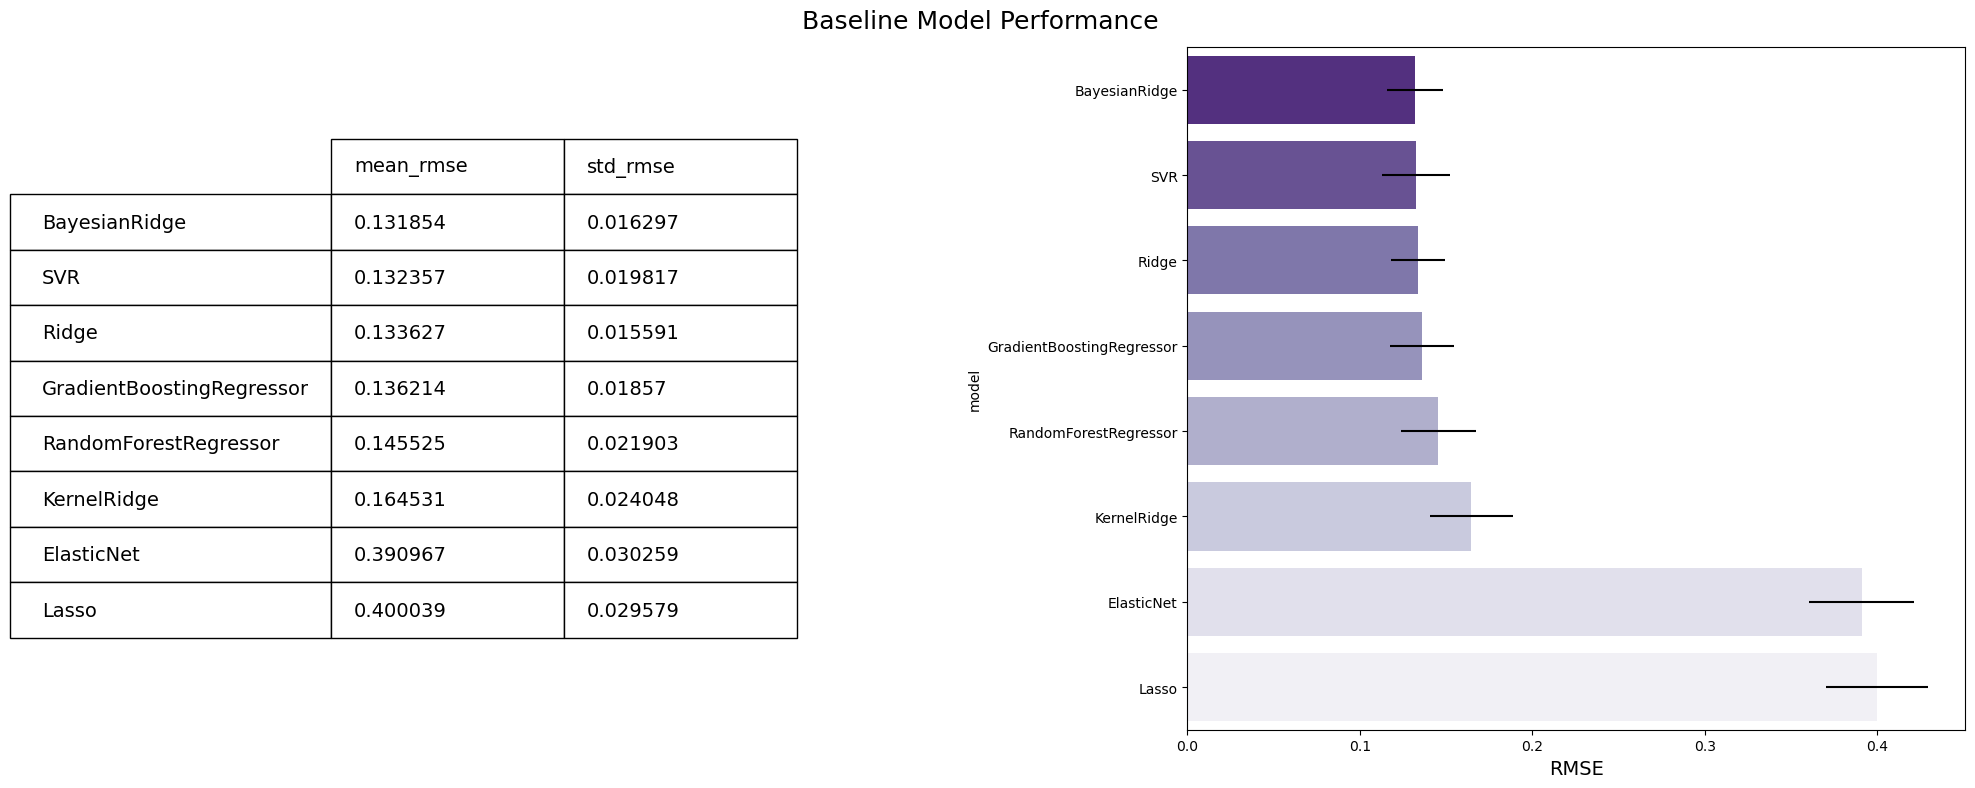

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

# Print the DataFrame
ax1.axis('off')
table = ax1.table(
            cellText=np.round(cv_scores.values, 6), colLabels=cv_scores.columns, rowLabels=cv_scores.index,
            loc='center',cellLoc='left', colLoc='left', colWidths=[0.15,0.15]
)

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 3)

# Create the bar plot
sns.barplot(x='mean_rmse', y=cv_scores.index, data=cv_scores, orient="h", xerr=cv_scores['std_rmse'], ax=ax2, palette=palettes[1])
ax2.set_xlabel('RMSE', fontsize=14)

plt.suptitle('Baseline Model Performance', fontsize=18)
plt.tight_layout()
plt.show()

In [55]:
def grid_search(model, param_grid, ens=False):
    grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=4)
    grid_search.fit(X, y_log)
    bestestimator = grid_search.best_estimator_ 
    bestscore= np.sqrt(-grid_search.best_score_) 
    bestparams= grid_search.best_params_
    if not ens:
        return bestestimator, bestscore
    else:
        return bestparams, bestscore

In [56]:
params = [
    {'ridge__alpha':[3, 5, 7, 9, 11, 13, 15]}, #ridge
    {'lasso__alpha':[ 0.0001, 0.0003, 0.0005, 0.0007, 0.0009], 'lasso__max_iter':[100000]}, # lasso
    {'elasticnet__alpha':[0.0004, 0.0005, 0.0007, 0.001], 'elasticnet__l1_ratio': [0.3, 0.6, 0.9]}, # elasticnet
    {'bayesianridge__alpha_1': [1e-7, 1e-6, 1e-5, 1e-4], 'bayesianridge__alpha_2': [1e-7, 1e-6, 1e-5, 1e-4],
      'bayesianridge__lambda_1': [1e-7, 1e-6, 1e-5, 1e-4], 'bayesianridge__lambda_2': [1e-7, 1e-6, 1e-5, 1e-4]}, #bayesianridge
    {'svr__epsilon': [0.001, 0.005, 0.009], 'svr__kernel' : ['poly', 'rbf', 'sigmoid'] ,
        'svr__degree':[1, 2, 3], 'svr__C':[1,5,10], 'svr__gamma': [0.00001, 0.00005, 0.0009],}, #svr
    {'kernelridge__alpha': [0.1, 0.3, 0.6, 0.9], 'kernelridge__kernel':['linear','polynomial'], 
        'kernelridge__degree':[2,3,4], 'kernelridge__coef0':[0.01, 2.5, 5]}, #kernelridge
    {'n_estimators': [100, 300, 500,], 'max_depth': [5, 7, None], 'min_samples_split': [6, 8]}, #randomforest
    {'n_estimators': [100, 300, 500], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1], 'loss' : ['huber']}, #gradientbosting
]

best_estimator = []

for idx, ((name, model), param_grid) in enumerate(zip(baseline_models, params)):
    if idx < 6:
        pipe = make_pipeline(RobustScaler(), model)
        best_estimator.append((name, *grid_search(pipe, param_grid)))
    else:
        best_estimator.append((name, *grid_search(model, param_grid, ens=True)))

In [57]:
best_estimators = pd.DataFrame(data=best_estimator, columns=['model', 'best_estimator', 'best_score']
                               ).sort_values('best_score').set_index('model')
best_estimators

,best_estimator,best_score
model,,
ElasticNet,"(RobustScaler(), ElasticNet(alpha=0.001, l1_ra...",0.132011
SVR,"(RobustScaler(), SVR(C=10, degree=1, epsilon=0...",0.132100
KernelRidge,"(RobustScaler(), KernelRidge(alpha=0.9, coef0=...",0.132106
Lasso,"(RobustScaler(), Lasso(alpha=0.0003, max_iter=...",0.132313
Ridge,"(RobustScaler(), Ridge(alpha=15))",0.132402
BayesianRidge,"(RobustScaler(), BayesianRidge(alpha_1=1e-07, ...",0.132857
GradientBoostingRegressor,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",0.133318
RandomForestRegressor,"{'max_depth': None, 'min_samples_split': 6, 'n...",0.146082


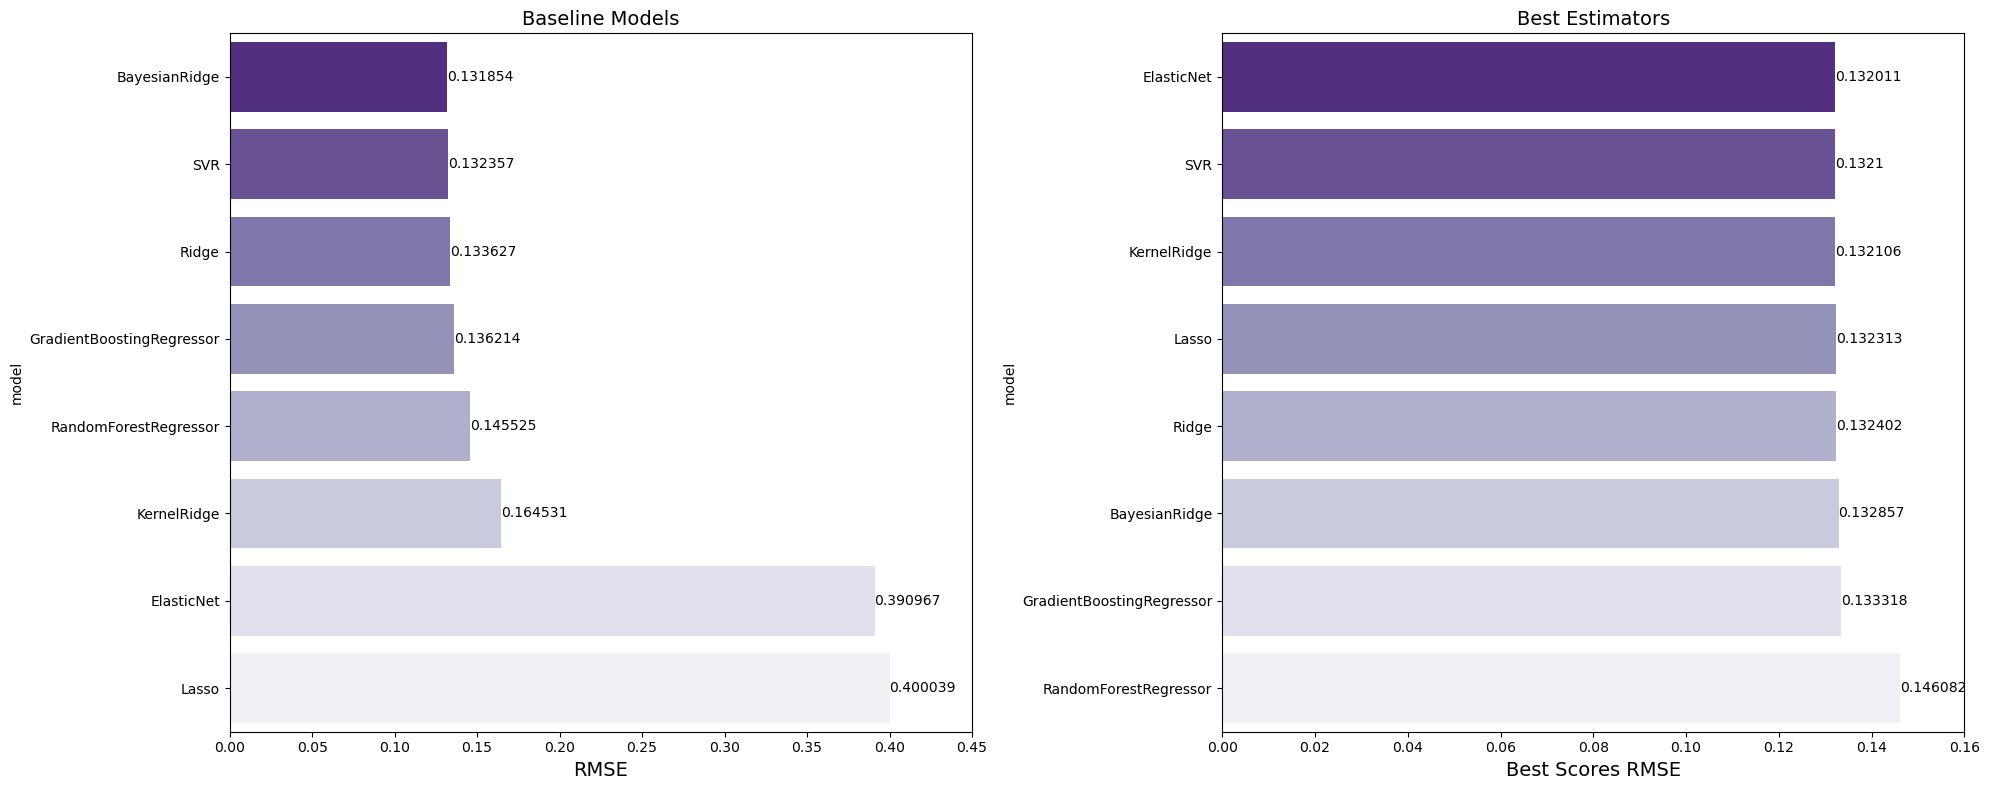

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8), dpi=100)

# baseline models
chart= sns.barplot(x='mean_rmse', y=cv_scores.index, data=cv_scores, orient="h", ax=ax1, palette=palettes[1])
for val in chart.containers:
    chart.bar_label(val,)
    
ax1.set_xlabel('RMSE', fontsize=14)
ax1.set_xlim(xmax=0.45)
ax1.set_title('Baseline Models', fontsize=14)

# best estimators
chart = sns.barplot(x='best_score', y=best_estimators.index, data=best_estimators, orient="h", ax=ax2, palette=palettes[1])
for val in chart.containers:
    chart.bar_label(val,)
    
ax2.set_xlabel('Best Scores RMSE', fontsize=14)
ax2.set_xlim(xmax=0.16)
ax2.set_title('Best Estimators', fontsize=14)

plt.tight_layout()
plt.show()

In [59]:
#Stacking 
from mlxtend.regressor import StackingCVRegressor

# initialize base models
sel_models = best_estimators.reset_index()['best_estimator'][1:-2].to_list()

# initialize meta-model
meta = best_estimators.reset_index()['best_estimator'][0]

# initialize StackingCVRegressor
stack = StackingCVRegressor(regressors=sel_models, meta_regressor=meta)

# fit stack
stack.fit(X, y_log)


StackingCVRegressor(meta_regressor=Pipeline(steps=[('robustscaler',
                                                    RobustScaler()),
                                                   ('elasticnet',
                                                    ElasticNet(alpha=0.001,
                                                               l1_ratio=0.3))]),
                    regressors=[Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                                                ('svr',
                                                 SVR(C=10, degree=1,
                                                     epsilon=0.009,
                                                     gamma=0.0009))]),
                                Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                                                ('kernelridge',
                                                 KernelRidge(alpha=0.9, coef0=5,
                                                             degree=2,
                                                             kernel='polynomial'))]),
                                Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                                                ('lasso',
                                                 Lasso(alpha=0.0003,
                                                       max_iter=100000))]),
                                Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                                                ('ridge', Ridge(alpha=15))]),
                                Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                                                ('bayesianridge',
                                                 BayesianRidge(alpha_1=1e-07,
                                                               alpha_2=0.0001,
                                                               lambda_1=0.0001,
                                                               lambda_2=1e-07))])])

In [60]:
#Prediction
# predict with stack
yhat = stack.predict(X_test)
yhat = np.expm1(yhat)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [61]:
sub = pd.DataFrame(yhat, index=X_test.index.astype(int), columns=['SalePrice'])
sub.to_csv('sub.csv')
sub.head()

,SalePrice
Id,
2001,151865.183383
2002,198830.341167
2003,103814.677691
2004,89233.956916
2005,113278.253945
